In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
data = pd.read_csv('TCS.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4687 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4687 non-null   datetime64[ns]
 1   Open    4687 non-null   float64       
 2   High    4687 non-null   float64       
 3   Low     4687 non-null   float64       
 4   Close   4687 non-null   float64       
 5   Volume  4687 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 256.3 KB


In [5]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,2005-01-03,166.932495,169.587494,166.932495,169.157501,4734168.0
1,2005-01-04,168.750000,169.250000,166.645004,167.657501,4979104.0
2,2005-01-05,167.524994,167.524994,160.037506,165.625000,9604320.0
3,2005-01-06,165.000000,168.250000,161.562500,165.057495,8006888.0
4,2005-01-07,166.250000,168.125000,164.082504,167.494995,7623136.0
5,2005-01-10,168.582504,169.925003,165.250000,165.932495,7521568.0
6,2005-01-11,166.250000,166.912506,162.625000,164.220001,7986376.0
7,2005-01-12,165.744995,170.994995,160.837494,162.257507,20720032.0
8,2005-01-13,163.750000,167.337494,159.375000,161.612503,27757952.0
9,2005-01-14,163.087494,164.737503,159.625000,162.050003,15757776.0


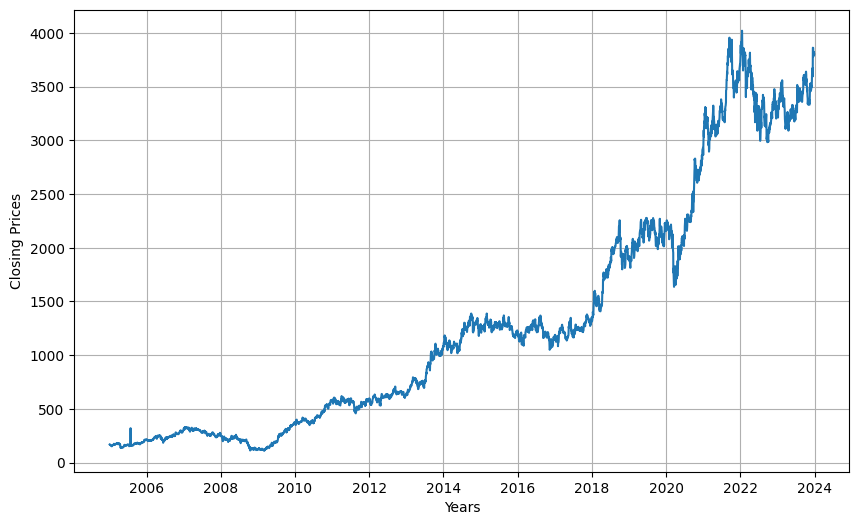

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data['Date'],data['Close'])
plt.show()

In [7]:
len(data)

4687

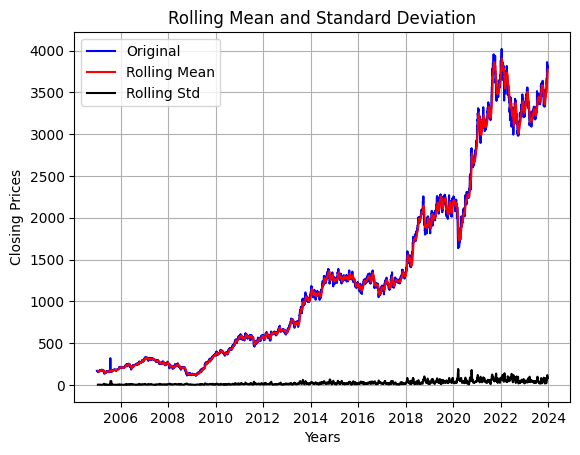

Results of dickey fuller test
Test Statistics                   1.193544
p-value                           0.995941
No. of lags used                 31.000000
Number of observations used    4655.000000
critical value (1%)              -3.431756
critical value (5%)              -2.862161
critical value (10%)             -2.567101
dtype: float64


In [8]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.grid(True)
    plt.xlabel('Years')
    plt.ylabel('Closing Prices')
    date = data[:].Date
    
    plt.plot(date,timeseries, color='blue',label='Original')
    plt.plot(date,rolmean, color='red', label='Rolling Mean')
    plt.plot(date,rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

In [9]:
returns = data['Close'].pct_change().dropna()
returns

1      -0.008867
2      -0.012123
3      -0.003426
4       0.014768
5      -0.009329
          ...   
4689    0.001971
4690    0.009637
4691   -0.007440
4692    0.004123
4693   -0.002965
Name: Close, Length: 4686, dtype: float64

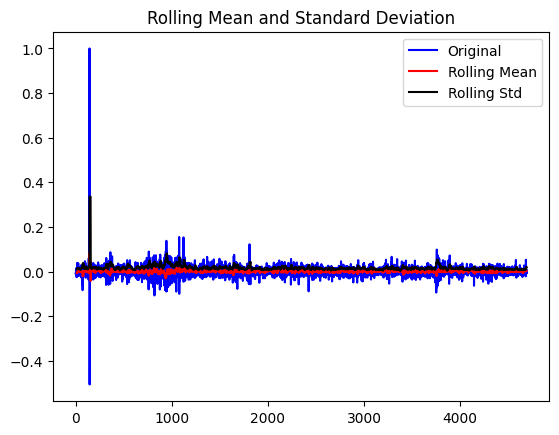

Results of dickey fuller test
Test Statistics                 -39.155480
p-value                           0.000000
No. of lags used                  3.000000
Number of observations used    4682.000000
critical value (1%)              -3.431747
critical value (5%)              -2.862158
critical value (10%)             -2.567099
dtype: float64


In [10]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(returns)



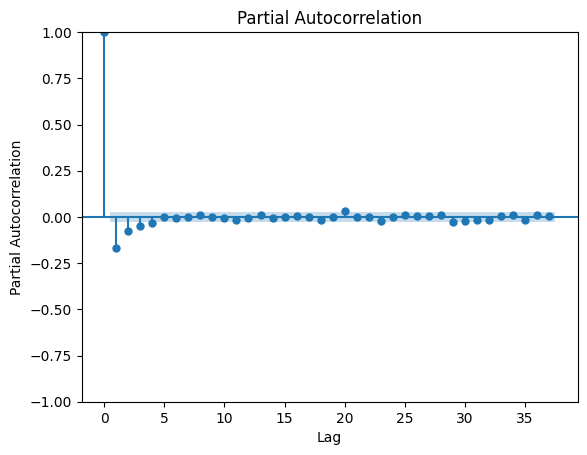

In [11]:
plot_pacf(returns, method = 'ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

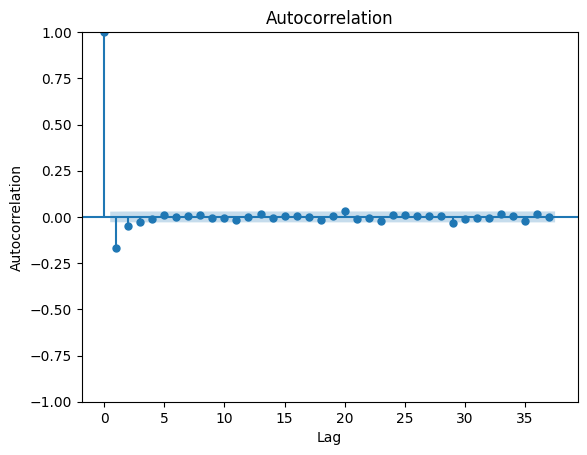

In [12]:
plot_acf(returns)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
row = int(len(data)*0.9)
train_data = list(data[:row]['Close'])
test_data = list(data[row:]['Close'])

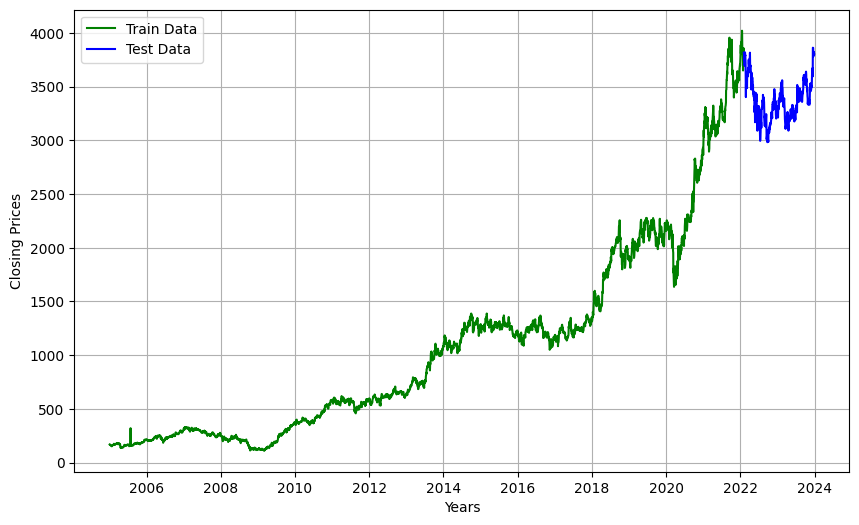

In [39]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

In [41]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10],len(train_data))
print(test_data[:10],len(test_data))

[169.157501, 167.657501, 165.625, 165.057495, 167.494995, 165.932495, 164.220001, 162.257507, 161.612503, 162.050003] 4218
[3814.899902, 3779.0, 3743.449951, 3760.550049, 3770.350098, 3694.949951, 3733.75, 3817.800049, 3813.100098, 3784.199951] 469


In [42]:
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(3, 1, 2))  #p,d,q
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[3819.63319496]
[3816.40385229]
[3786.03404502]
[3748.94087877]
[3759.39666954]
[3765.0070122]
[3692.94689916]
[3736.58467207]
[3821.38498025]
[3811.50940135]
[3778.74703142]
[3791.66359638]
[3724.51954528]
[3591.77395095]
[3569.85997325]
[3403.18264987]
[3522.98934229]
[3551.13483937]
[3544.34907639]
[3544.3661967]
[3524.87973242]
[3485.16075526]
[3599.41086327]
[3628.28824466]
[3621.28569711]
[3599.63136154]
[3642.84509034]
[3593.74090409]
[3655.57069003]
[3670.70558176]
[3628.37877553]
[3699.3467782]
[3709.84504214]
[3749.55476596]
[3707.17609298]
[3708.76846996]
[3705.73809941]
[3730.95846612]
[3738.88734478]
[3757.74659207]
[3769.33840029]
[3813.10652915]
[3755.37277111]
[3687.53409936]
[3688.59065703]
[3696.81629766]
[3690.90820528]
[3662.76888095]
[3532.19237591]
[3477.73988696]
[3558.62854657]
[3626.60657279]
[3606.05960825]
[3544.27209807]
[3553.03967309]
[3569.8944785]
[3585.0479619]
[3540.50937668]
[3538.3349412]
[3482.7714421]
[3520.4276448]
[3436.81109203]
[3444.65862325]


In [43]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4686
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -21715.305
Date:                Tue, 21 May 2024   AIC                          43442.610
Time:                        00:20:28   BIC                          43481.323
Sample:                             0   HQIC                         43456.223
                               - 4686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.009     -0.941      0.347      -0.025       0.009
ar.L2         -0.9922      0.003   -382.771      0.000      -0.997      -0.987
ar.L3         -0.0196      0.008     -2.392      0.0

In [44]:
len(model_predictions)

469

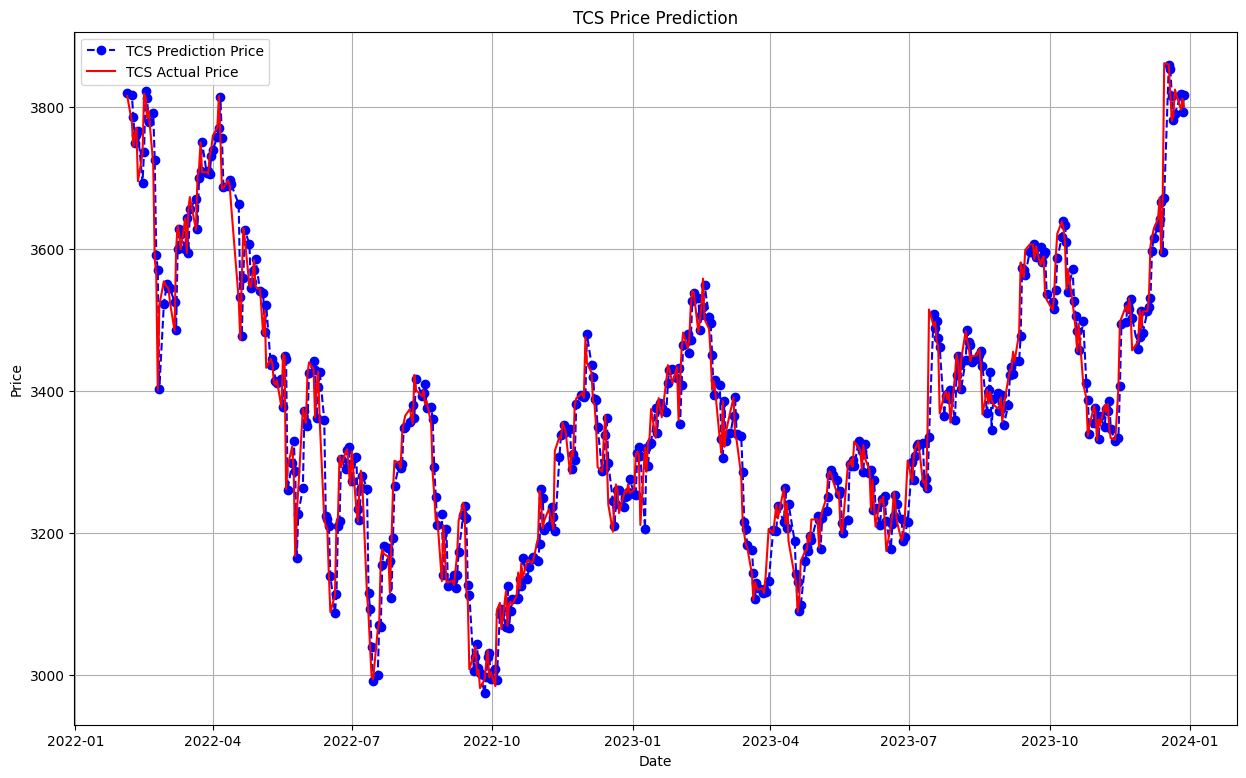

In [45]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'TCS Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'TCS Actual Price')

plt.title('TCS Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [46]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.06312366143792318
Accuracy:  93.68763385620768
